## Part 1 - General Questionss 

#### **a. What are the linear regression assumptions?**

There are four assumptions associated with a linear regression model:  

1. Linearity: The relationship between X and the mean of Y is linear.  
2. Homoscedasticity: The variance of residual is the same for any value of X.  
3. Independence: Observations are independent of each other.  
4. Normality: For any fixed value of X, Y is normally distributed.

#### **b. Give several examples that assumptions may be violated? Explain what is violated and why?**

1. Linearity - Correlation between X and Y that ain't linear:

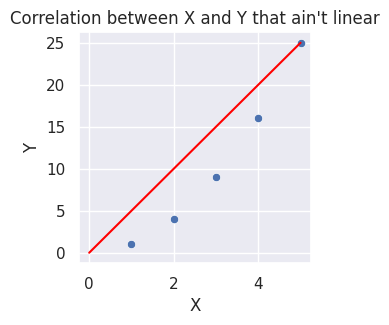

In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize':(3,3)})
X = [1, 2, 3, 4, 5]
Y = [1, 4, 9, 16, 25]
ax = sns.scatterplot(x=X, y=Y)
ax.set_title("Correlation between X and Y that ain't linear")
ax.set_xlabel("X")
ax.set_ylabel("Y")
sns.lineplot(x=[0,5], y=[0,25], color='red');

1. Linearity - No correlation between X and Y:

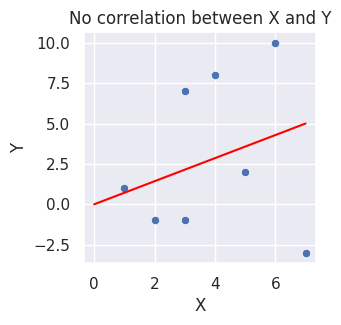

In [2]:
X = [1, 2, 3, 4, 5, 6, 7, 3]
Y = [1, -1, 7, 8, 2, 10, -3, -1]
ax = sns.scatterplot(x=X, y=Y)
ax.set_title("No correlation between X and Y")
ax.set_xlabel("X")
ax.set_ylabel("Y")
sns.lineplot(x=[0,7], y=[0,5], color='red');

2. Homoscedasticity - The aassumption of linear regression is that the residuals have constant variance at every level of x.  
When heteroscedasticity is present in a regression analysis, the results of the analysis become hard to trust. Specifically, heteroscedasticity increases the variance of the regression coefficient estimates, but the regression model doesn’t pick up on this. This makes it much more likely for a regression model to declare that a term in the model is statistically significant, when in fact it is not.  
**The simplest way to detect heteroscedasticity is by creating a fitted value vs. residual plot**  
What to do if this assumption is violated:  
a. Transform the dependent variable.  
b. Redefine the dependent variable.  
c. Use weighted regression. 

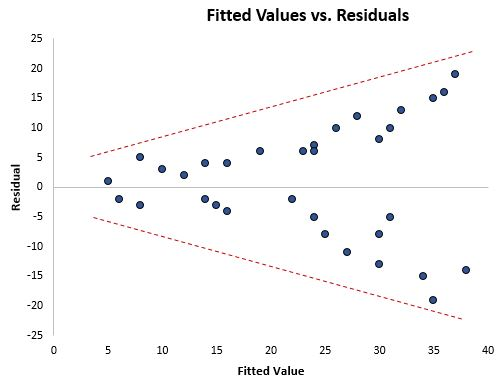

In [3]:
from IPython import display
display.Image("het.jpg")

3. Independence - the residuals are independent.  
We don’t want to have a pattern among consecutive residuals. For example, residuals shouldn’t steadily grow larger as time goes on.  
most of the residual autocorrelations should fall within the 95% confidence bands around zero, which are located at about +/- 2-over the square root of n, where n is the sample size.  
Also, formally test for this assumption is met using the Durbin-Watson test. 

4. Normality - the residuals are normally distributed.   
A Q-Q plot (quantile-quantile) is a type of plot that can be use to determine whether or not the residuals of a model follow a normal distribution. If the points on the plot roughly form a straight diagonal line, then the normality assumption is met.

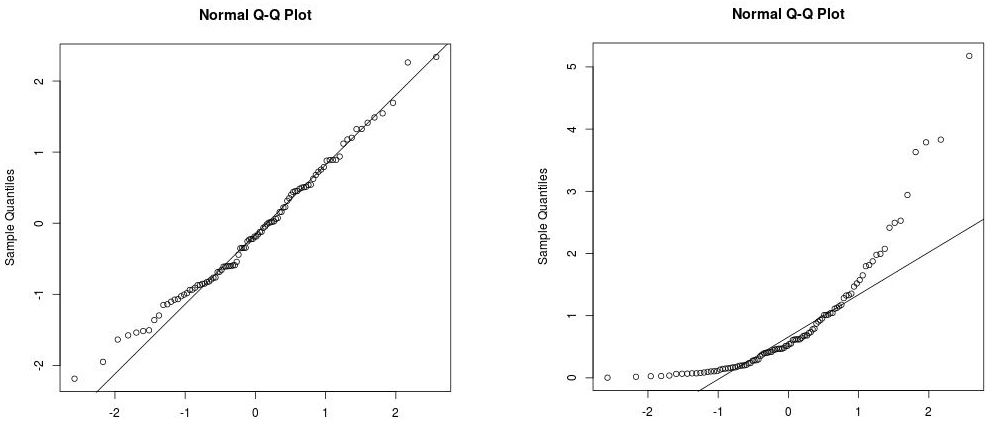

In [4]:
display.Image("nor.jpg")

#### **c. What is the difference between lemmatizing and stemming?**

**Stemming uses the stem of the word, while lemmatization uses the context in which the word is being used.**
  
Stemming algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word.

Lemmatization takes into consideration the morphological analysis of the words. It is necessary to have dictionaries which the algorithm can look through to link the form back to its lemma. 
* Stemming has its application in Sentiment Analysis while Lemmatization has its application in Chatbots, human-answering.  
* For instance, stemming the word ‘Caring‘ would return ‘Car‘, Lemmatizing the word ‘Caring‘ would return ‘Care‘.

#### **d. Explain in plain Hebrew, what is transfer learning?**

שיטה בה נעשה שימוש במודל שצבר ידע אודות בעיה מסוימת, עבור פתרון של בעיה דומה.
לדוגמא: מודל שאומן לזהות מכוניות, יכול להיות שימושי עבור בעיה של זיהוי משאיות.  

Transfer learning is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks. 

#### **e. What PCA does?**

PCA is a technique for reducing the dimensionality of datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

For a more visual explaintion on how the techinque work: https://archive.ph/Zric9  
(https://towardsdatascience.com/pca-principal-component-analysis-explained-visually-in-5-minutes-20ce8a9ebf0f)

## Part 2 - Tasks

### a. 
The file data.csv provide information on questions from different tests (every row represents summary statistic on one question). You’ve being asked to explain the learning patterns of practitioners in Macho-Noam. Please analyze the data and provide visualization when possible. Explain what your way of thinking. 

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')
df.sample(4)

,success,total,count,hash,Rbis,atiq,std,avgscore,cumasum,idcounter,rtio,test_content_id
39,54.63,1801,227,12.60,2.635061,11.665459,3.096895,5.670310,466.363527,9,0.850872,H_Avtipus_Math_Graph_1
27,47.45,2833,607,21.43,2.728949,35.770833,2.198718,5.302158,305.270833,7,1.241155,H_Avtipus_Fluid_Matrix_3
25,26.69,2833,712,25.13,2.759427,60.388333,2.198718,5.302158,215.270833,5,1.255017,H_Avtipus_Fluid_Matrix_3
21,97.70,2833,826,29.16,2.133372,30.912500,2.198718,5.302158,49.127500,1,0.970280,H_Avtipus_Fluid_Matrix_3


Looking at the sampled data: all the data, except `test_content_id` is numerical and ordinal (except `idcounter`).

We were given the followingg information: 
   * success - rate of success for answering the question  
   * total - Number of shows (appearances) of the question  
   * count - 
   * hash - rate of answering of the question
   * Rbis - Bi-seiral coefficient  (?)
   * atiq - Average time for answering the question
   * std - Standard deviation of the test's grade for the question
   * avgscore - Average score for the test
   * cumasum - Average time that passed from the beginning of the test until the question.
   * idcounter - The number of the question in the test (order)
   * rtio - 
   * test_content_id - 

Asserting for no duplicated rows in the data set:

In [6]:
assert df.duplicated().sum() == 0

Checking for NaNs in the data set:

In [7]:
print('Number of rows with NaNs:' ,df.isna().values.any().sum())

Number of rows with NaNs: 1


 Let's view the row:

In [8]:
df[df.isna().values == True] # The row is not duplicated, it's shown twice because it has 2 NaNs in it.

,success,total,count,hash,Rbis,atiq,std,avgscore,cumasum,idcounter,rtio,test_content_id
88,0.0,151,17,11.26,NaN,44.831683,1.296499,1.395349,354.613861,5,NaN,H_Avtipus_Verbal_Analogy_3
88,0.0,151,17,11.26,NaN,44.831683,1.296499,1.395349,354.613861,5,NaN,H_Avtipus_Verbal_Analogy_3


**We found 2 Nans** in the same row. One in Rbis column and the other in rtio.  
We can either fill it logicaly (depends on the meaning of the column - filling with avg, most common etc),  
or we can remove the row and lose the data point (should be thought for each case).  
For now, we will remove the row.

In [9]:
df.drop(index=88, inplace=True)

In [10]:
print(f'There are {df.test_content_id.nunique()} unique questions.')
print(f'The longest test consisted of {df.idcounter.max()}') ###

There are 12 unique questions.
The longest test consisted of 12


Looking at the data's values:

In [11]:
df.describe()

,success,total,count,hash,Rbis,atiq,std,avgscore,cumasum,idcounter,rtio
count,118.000000,118.000000,118.00000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,52.141102,1698.033898,392.29661,23.344407,2.269422,37.435381,2.324669,4.270635,247.549911,4.711864,0.980549
std,22.254987,1258.290822,313.97698,8.114268,0.830137,22.154898,0.516267,1.439239,126.361429,3.271482,0.270813
min,14.630000,151.000000,26.00000,7.200000,0.895990,2.126812,1.296499,1.395349,18.215000,0.000000,0.530273
25%,35.625000,873.000000,161.00000,17.502500,1.661392,22.708453,2.057532,3.286920,148.490502,2.000000,0.803043
50%,48.455000,1275.000000,264.00000,23.860000,2.130277,32.522913,2.364130,4.683230,241.172716,4.000000,0.935273
75%,69.377500,2575.000000,535.50000,28.750000,2.625997,48.711242,2.771732,5.580227,350.834954,7.000000,1.131971
max,98.700000,4768.000000,1231.00000,39.980000,5.735849,126.712871,3.096895,5.940120,476.771739,12.000000,2.060524


* success average is 51.7.  
* total: some of the questions are considerably shown more than others (min and max values).  
* count is not described and therefor will be ignored from the analysis (we don't know the meaning of the data).  
* hash values are between 7.2 to 39.98: if has is a ratio for answering a question, it means most of the questions are usually not being answered (all under 50%).  
* atiq, the avg time for answering a question is 37.5 (units unknown, min?) 
* avg of avgscore is 4.24, min and max values are 1.39 and 5.94 respectively. 
* cumasum is the time that passed from the beginning of the test until the question and goes with idcounter

We will plot some of the data and look for insights:

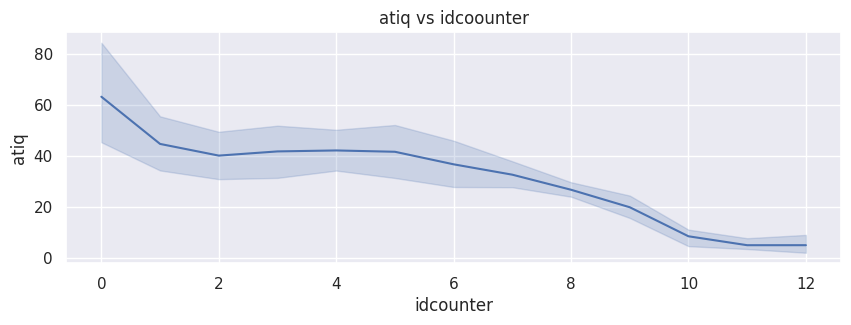

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,3)})
sns.lineplot(x=df.idcounter, y=df.atiq).set(title='atiq vs idcoounter');

We can see that the first questions receive more time compared to the later.  
Let cross it vs `success`:

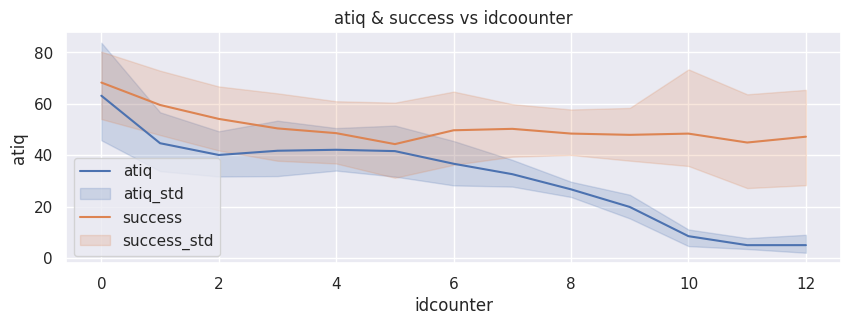

In [13]:
sns.lineplot(y=df.atiq, x=df.idcounter).set(title='atiq & success vs idcoounter')
sns.lineplot(y=df.success, x=df.idcounter)
plt.legend(labels=['atiq', 'atiq_std', 'success', 'success_std']);

Indeed the rate of success is higher on the first questions, towards the second 1/3 of the test it comes to a plato and there isn't a difference between the middle of the test and it's end.  
This might indicate that the students put more effort (time) at the start of the test, and get at those questions a better success ratio.

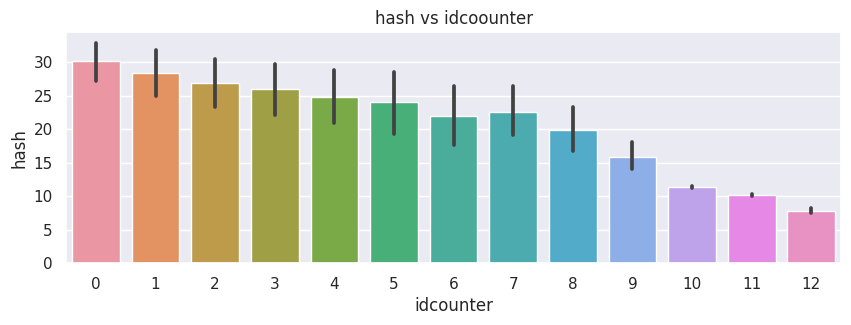

In [14]:
sns.barplot(x=df.idcounter, y=df.hash).set(title='hash vs idcoounter');

As was mentioned, hash is the rate of answering a question. Because it's a **rate**, we dont need to normalize it by the number of shows of the question.

From `hash vs idcoounter` graph we can see that the first questions get answered significantly more than the later.   
The last questions barley get even unanswered compared to the start.  
That (together with previous theory) might indicate that due to spending too much time at the beginning of the test, the students don't save enough time for the last questions and maybe even not answering them because of that.

<u>There might be a problem with the student's time management, regardless on the subject they are being test on.</u>

Lastly for this section (there are still a lot of insights that can be extracted here),  
We will look on the heat map.  
The heat map provide us a visualization of positive (1) and negative (-1) correlations, and couples of columns without any correlation (0):

<AxesSubplot:>

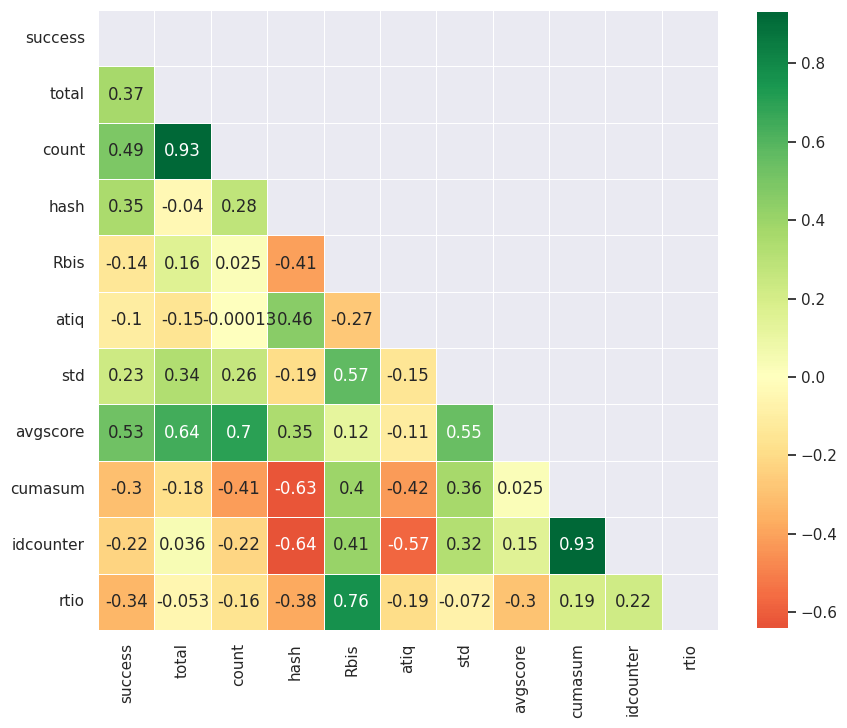

In [15]:
import matplotlib.pyplot as plt
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=mask, cmap="RdYlGn", center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot=True)

We can see strong positive correlations for: `count-total`(elementary), `idcounter-cumasum` (elementary), `Ribs-rtio`, `avgscore-count`  
And e can see strong negative correlations for: `idcounter-hash`(elementary), `cumasum-hash`(elementary)

The pair plot is another way to look for correlations for the whole data set (but more hard to read):

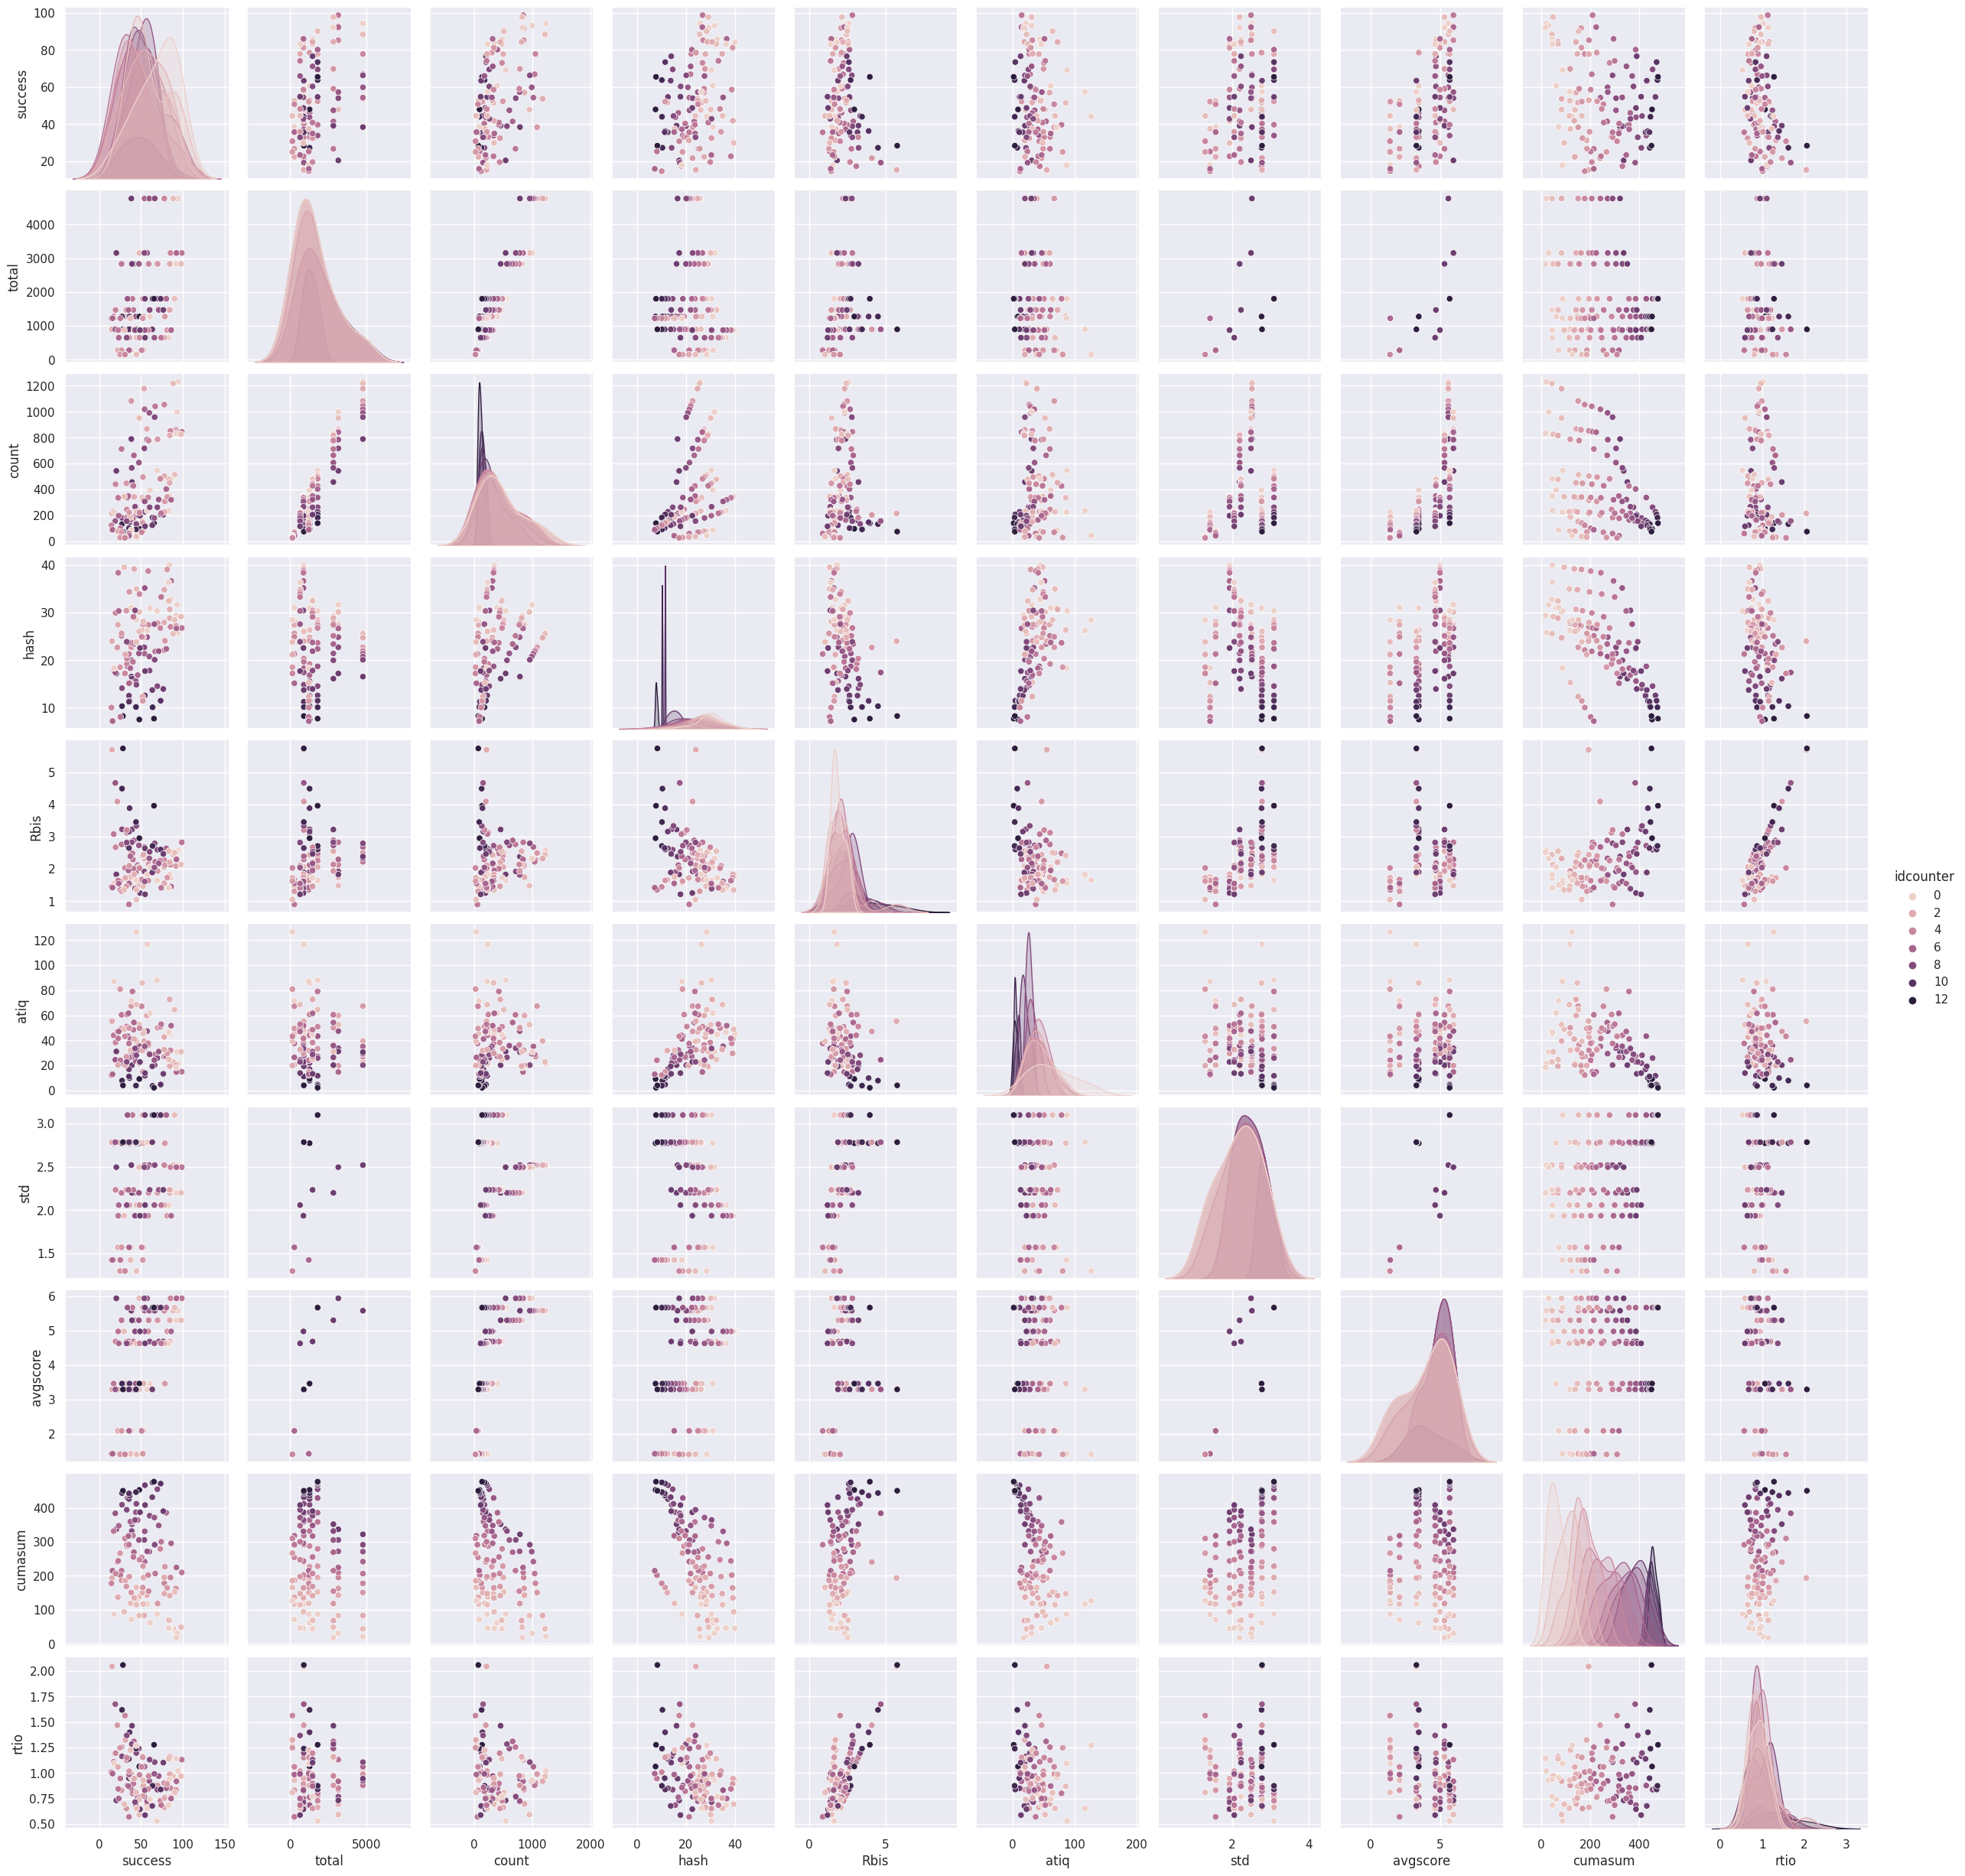

In [16]:
sns.pairplot(df,hue='idcounter');

### b.
In the list of CVs, try to cluster the CV files by topics 

We will use k-means for clustering, using tf-idf technique (to find meaningful words) for variables.  
The steps would be:
1. fetch the data,
2. represent each cv as a vector,
3. perform k-means clustering,
4. evaluate the result.

In [2]:
import docx

def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

ModuleNotFoundError: No module named 'docx'

In [3]:
import os

def list_files_in_folder(dir_path):
    res = []
    for path in os.listdir(dir_path):
        if os.path.isfile(os.path.join(dir_path, path)): # check if current path is a file
            res.append(path)
    return(res)

In [4]:
import pandas as pd

def load_cvs(cv_files):
    cvs_content_list=[]
    titles=[]
    for cv_file in cv_files:
        print("loading content: ",cv_file)
        cvs_content_list.append(getText(f'CVs/{cv_file}'))
        titles.append(cv_file)
    return titles, cvs_content_list

Fetching the data:

In [20]:
cvs_titles, cvs_content = load_cvs(list_files_in_folder('CVs/'))

loading content:  Truck-Driver-Resume-Sample-MSWord-Download.docx
loading content:  Housekeeping-Resume-Sample-MSWord-Download.docx
loading content:  Bank-Teller-Resume-Sample-MSWord-Download.docx
loading content:  Electrician-Resume-Sample-MSWord-Download.docx
loading content:  Sales-Associate-Resume-Sample-MSWord-Download.docx
loading content:  Bookkeeper-Resume-Sample-MSWord-Download.docx
loading content:  Delivery-Driver-Resume-Sample-MSWord-Download.docx
loading content:  Nanny-Resume-Sample-MSWord-Download.docx
loading content:  Data-Analyst-Resume-Example-MSWord-Download.docx
loading content:  English-Tutor-Resume-Sample-MSWord-Download.docx
loading content:  Music-Resume-Sample-MSWord-Download.docx
loading content:  Shipping-and-Receiving-Clerk-Resume-Sample-MSWord-Download.docx
loading content:  Warehouse-Worker-Resume-Sample-MSWord-Download.docx
loading content:  Elementary-Teacher-Resume-Sample-MSWord-Download.docx
loading content:  Makeup-Artist-Resume-Sample-MSWord-Downloa

Since we are going to use k-means, we need to represent each article as a numeric vector. 
A method is to use term-frequency/inverse-document-frequency (tf-idf). Put it simply, with this method for each word w and document d we calculate:

* tf(w,d): the ratio of the number of appearances of w in d divided with the total number of words in d.
* idf(w): the logarithm of the fraction of the total number of documents divided by the number of documents that contain w.
* tfidf(w,d)=tf(w,d) x idf(w)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})  # stop words are excluded
X = vectorizer.fit_transform(cvs_content)

Perform k-means clustering:  
Each row of variable X is a vector representation of a cv. Hence, we can use X as input for the k-means algorithm.  
First, we must decide on the number of clusters. Here, we will use the elbow method.

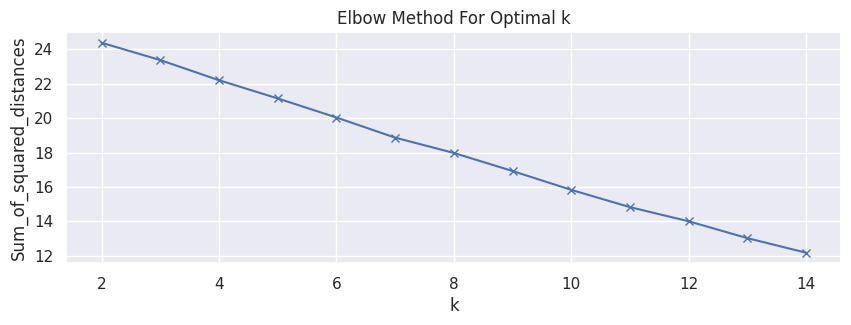

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The plot is almost a straight line, probably because we have to few cvs. 
We will try to cluster into 7 groups (after trial and error, not a clear clustering number).


In [23]:
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
cvs_cl=pd.DataFrame(list(zip(cvs_titles,labels)),columns=['title','cluster'])
print(cvs_cl.sort_values(by=['cluster']))

                                                title  cluster
16  Graphic-Designer-Resume-Sample-MSWord-Download...        0
15  Software-Engineer-Resume-Sample-MSWord-Downloa...        1
28              Experienced_Full-Stack_Developer.docx        1
5       Bookkeeper-Resume-Sample-MSWord-Download.docx        1
7            Nanny-Resume-Sample-MSWord-Download.docx        1
8    Data-Analyst-Resume-Example-MSWord-Download.docx        1
23  Business-Analyst-Resume-Example-MSWord-Downloa...        1
22      Accounting-Resume-Sample-MSWord-Download.docx        1
27  School-Bus-Driver-Resume-Sample-MSWord-Downloa...        2
26  Construction-Labor-Resume-Sample-MSWord-Downlo...        2
25       Flight-Attendant-Resume-MSWord-Download.docx        2
24             CDL-Driver-Resume-Sample-Download.docx        2
21  Maintenance-Worker-Resume-Sample-MSWord-Downlo...        2
20  combination-janitor-resume-sample-MSWord-downl...        2
0     Truck-Driver-Resume-Sample-MSWord-Download.docx  

Evaluate the result:  
Since we have used only 7 articles, it is fairly easy to evaluate the clustering just by examining what articles are contained in each cluster.   
That would be difficult for a large corpus. A nice way is to create a word cloud from the articles of each cluster.

Cluster: 0


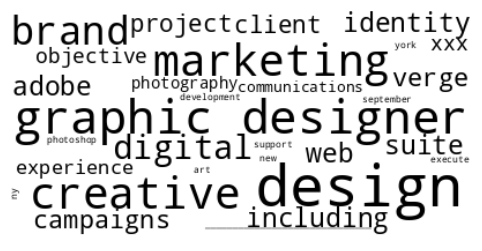

Cluster: 1


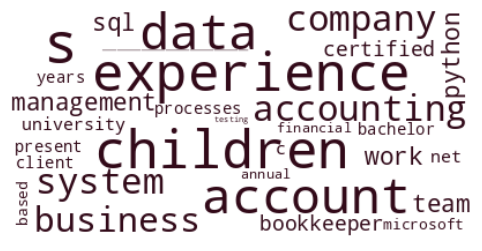

Cluster: 2


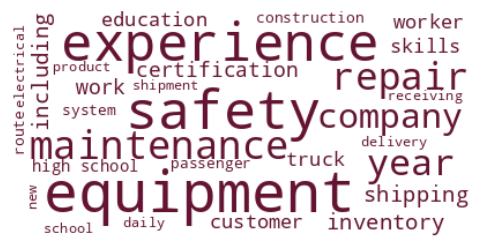

Cluster: 3


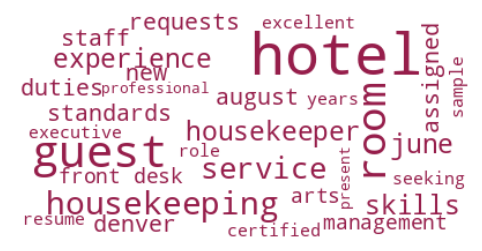

Cluster: 4


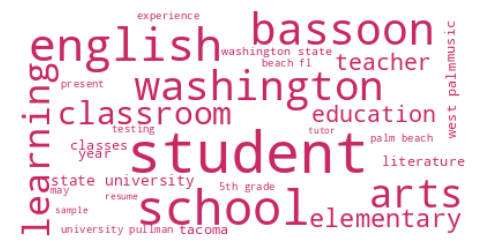

Cluster: 5


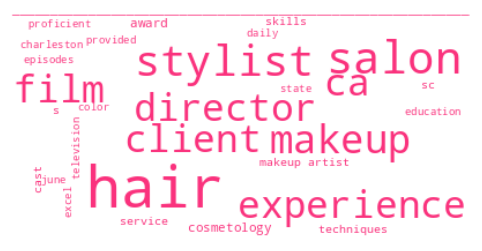

Cluster: 6


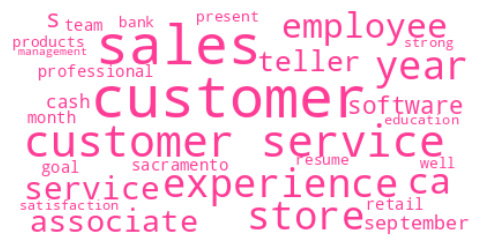

In [24]:
from wordcloud import WordCloud
result={'cluster':labels,'cvs_titles':cvs_content}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['cvs_titles'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", color_func=lambda *args, **kwargs: (k*50,k*10,k*25)).generate(text)
    # wordcloud = WordCloud(max_font_size=40, max_words=40, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Ways for improving the results: at the end of next section (c).

### c. 
The file positions.zip contains positions that were taken from amazon website. The file CVs.zip contain CV files for different positions. Your mission is to find match of positions for each cv file. Use python only.

This problem can be solved in different ways.  
A key in solving it, for whatever method, lies with a deep cleaning and simplification of the data.  
  
The method I chose to present consists by the next steps:
1. fetch the data,
2. represent each cv & position as a vector (for each),
3. calculating Word Mover’s Distance for each pair,
4. pairing the closest pair,
5. evaluate the result.

Word Mover’s Distance's idea:  
The dissimilarities between documents can be measured with semantical meanings by computing “the minimum amount of distance that the embedded words of one document need to ‘travel’ to reach the embedded words of another”.
The next cell is a simple example of the idea above:

In [25]:
# sentence_obama, sentence_president = 'Obama speaks to the media in Illinois', 'The president greets the press in Chicago'  # 1.0175
# sentence_obama, sentence_president = 'Obama', 'a duck in a green forest' # 1.346
# sentence_obama, sentence_president = 'Obama', 'white house'  # 1.316
# sentence_obama, sentence_president = 'Obama', 'president'  # 1.3381
# sentence_obama, sentence_president = 'Obama', 'obama'   # 0
# sentence_obama ,sentence_president= preprocess(sentence_obama), preprocess(sentence_president)
# distance = word2vec_model.wmdistance(sentence_obama, sentence_president)
# print('distance = %.4f' % distance)

We can see that closer (in semantics) sentences score lower.

#### Solution

In [26]:
# Import and download stopwords from NLTK.
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/jrock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')

In [28]:
def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

In [29]:
from os import listdir
from os.path import isfile, join
def create_pkls_list(dir_path):
    return [f for f in listdir(dir_path) if isfile(join(dir_path, f))]

In [30]:
import re
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

In [31]:
import pandas as pd
def load_position(position_path):
    return pd.read_pickle(position_path)

In [32]:
def clean_get_title_and_description(raw_pkl):
    return cleanhtml(raw_pkl['description']), cleanhtml(raw_pkl['basic_qualifications']), cleanhtml(raw_pkl['title'])

In [33]:
def get_positions(positions_dir_path):
    pos_descriptions = []
    pos_titles = []
    pos_basic_qualifications = []
    position_list = create_pkls_list(positions_dir_path)
    for position in position_list:
        curr_position = load_position(positions_dir_path+position)
        pos_description, pos_basic_qualification, pos_title = clean_get_title_and_description(curr_position)
        pos_descriptions.append(pos_description), pos_basic_qualifications.append(pos_basic_qualification), pos_titles.append(pos_title)
    return position_list, pos_titles, pos_basic_qualifications, pos_descriptions

Fetching the data:

In [34]:
position_list, pos_titles, pos_basic_qualifications, pos_descriptions = get_positions('positions/')

Of course, we need to decide what to embed now (and that is before clearing the data! which is a must but won't be done in this work).  
Let's try to match by pos_titles-cvs_titles:

In [35]:
print('Matching by pos_titles-cvs_titles:\n')
for cv in range(len(cvs_content)):
    res_temp = []
    match = None
    print(f'Looking for a match for CV: {cvs_titles[cv][:-28]}')
    for position_idx in range(len(position_list)):
        res_temp.append(word2vec_model.wmdistance(pos_titles[position_idx], ' '.join((' '.join(preprocess(cvs_titles[cv]))).split('-'))[:-4]))
    match = pos_titles[res_temp.index((min(res_temp)))]
    print(f'The position that matches is: {match[:-5]}\n')

Matching by pos_titles-cvs_titles:

Looking for a match for CV: Truck-Driver-Resume
The position that matches is: Programmer Analyst, World Wide Returns, Recommerce & Sustainab

Looking for a match for CV: Housekeeping-Resume
The position that matches is: Business Development Leader, Telco Cloud -

Looking for a match for CV: Bank-Teller-Resume
The position that matches is: Program Manager, Small Business Empowerment, Small Business Empowerment (

Looking for a match for CV: Electrician-Resume
The position that matches is: Program Manager, Small Business Empowerment, Small Business Empowerment (

Looking for a match for CV: Sales-Associate-Resume
The position that matches is: Process Improvement Asso

Looking for a match for CV: Bookkeeper-Resume
The position that matches is: Software Development Engineer, Kuiper Network Processor Platform

Looking for a match for CV: Delivery-Driver-Resume
The position that matches is: Servicenow Developer, Security Pro

Looking for a match for CV: Na

We can see that some of the results are good, but still there is a lot of room for improvment.  
Let's try to match by pos_descriptions-cvs_contents:

In [36]:
print('Matching by pos_descriptions-cvs_contents:\n')
for cv in range(len(cvs_content)):
    res_temp = []
    match = None
    print(f'Looking for a match for CV: {cvs_titles[cv][:-28]}')
    for position_idx in range(len(position_list)):
        res_temp.append(word2vec_model.wmdistance(pos_descriptions[position_idx], ' '.join(preprocess(cvs_content[cv]))))
    match = pos_titles[res_temp.index((min(res_temp)))]
    print(f'The position that matches is: {match[:-5]}\n')

Matching by pos_descriptions-cvs_contents:

Looking for a match for CV: Truck-Driver-Resume
The position that matches is: Cyber Resilience Lead, Global InfoSec GRC

Looking for a match for CV: Housekeeping-Resume
The position that matches is: Sr. Customer Insights Manager, Fire Ta

Looking for a match for CV: Bank-Teller-Resume
The position that matches is: Program Manager, SPS Fi

Looking for a match for CV: Electrician-Resume
The position that matches is: Sr. Solutions Architect, Alexa, Alexa Internat

Looking for a match for CV: Sales-Associate-Resume
The position that matches is: Amazon Style Backroom Associate (Full  Time) - Columbu

Looking for a match for CV: Bookkeeper-Resume
The position that matches is: Software Dev Eng

Looking for a match for CV: Delivery-Driver-Resume
The position that matches is: Program Manager, SPS Fi

Looking for a match for CV: Nanny-Resume
The position that matches is: Software Dev Eng

Looking for a match for CV: Data-Analyst-Resume-
The position th

Again, some of the results are good, but still there is a lot of room for improvement. We can see the matches were changed with changing the input for WMD.

**What can be done to improve the results**:  
* Cleaning the data - **maybe the most important thing to do**.  
Right now there is a lot of noise (locations, names, dates etc) that interfere with the wmd calculation.  
* Trying different embedings (doc2vec (unstructured date), sen2vec(structured data)).  
* Different pre-trained models.  
* Key words extraction (tf-idf etc).  
* NER filtering.  
* Filtering by features, such as remote-work, experience, education, locations etc.  
* Ensembles of models.

That problem is not simple and there is a lot that can be done to improve the algo. That work is not included in the notebook.

### d. 
Try to extract the following information form the cv files:
            i. Name
            ii. Email
            iii. Education
            iv. expirience

Solution

There are different ways to do some of the extractions.  
We will give an example for each:  
Let's load an example of one of the CVs:

**i. Name, iii. Education, iv. expirience**  
Unfortunately, all the CVs data don't contain names (only xxxx-xxxx style names).  
But!  
We will demonstrate how names can be recognized by models like spacy (for example):  
Spacy will also recognize **places** (can be used for education and location for the position), **dates** (can be used for **experience** together with **places** for **education**)

In [37]:
example_cv = ' '.join(preprocess(cvs_content[10]))
print(example_cv[:500] + '...')

music resume sample music@gmail.com | 123 address, tacoma, wa 98416 | (000) 000-000 education bachelor music performance, bassoon emphasis may 2014 washington state university, pullman, wa gpa: 3.8 experience orchestra seattle symphony orchestra, seattle, washington 2016 – present first chair, bassoon section oklahoma city philharmonic, oklahoma city, oklahoma 2014-2015 frequent sub, bassoon section washington state university, pullman, washington 2010-2014 symphony orchestra, bassoon wind ensem...


In [38]:
import spacy
from spacy import displacy
from collections import Counter

nlp = spacy.load('en_core_web_sm')
sample_doc = nlp(example_cv)
displacy.render(sample_doc, style='ent', jupyter = True)
print('\n\nEntities in the sentence and their type:\n\n',[(ent.text, ent.label_) for ent in sample_doc.ents],'\n')
persons_list = [word.text for i in range(0, len(sample_doc)) for word in sample_doc.ents if word.label_ == 'PERSON']
print('\nList of pepole that are mentioned in the text:', Counter(persons_list).most_common())

2022-08-29 04:28:07.123706: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-29 04:28:07.123723: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-29 04:28:08.051316: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-29 04:28:08.051334: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-29 04:28:08.051346: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jrock-office): /proc/driver/nvidia/version does not exist




Entities in the sentence and their type:

 [('123', 'CARDINAL'), ('98416', 'DATE'), ('may 2014', 'DATE'), ('washington state university', 'ORG'), ('3.8', 'CARDINAL'), ('seattle symphony orchestra', 'ORG'), ('seattle', 'GPE'), ('washington', 'GPE'), ('2016', 'DATE'), ('first', 'ORDINAL'), ('oklahoma city', 'GPE'), ('oklahoma', 'GPE'), ('2014-2015', 'DATE'), ('section washington state university', 'ORG'), ('washington', 'GPE'), ('2010-2014', 'DATE'), ('washington 2011-2012', 'ORG'), ('washington state university', 'ORG'), ('washington', 'GPE'), ('2010-2014', 'DATE'), ('washington state university', 'ORG'), ('washington', 'GPE'), ('2011', 'DATE'), ('2010', 'DATE'), ('tacoma', 'GPE'), ('washington', 'GPE'), ('2009', 'DATE'), ('tacoma', 'GPE'), ('washington', 'GPE'), ('2014', 'DATE'), ('washington', 'GPE'), ('2013', 'DATE'), ('2014', 'CARDINAL'), ('tacoma', 'GPE'), ('washington 2012-2013', 'ORG'), ('washington state university school music', 'ORG'), ('2010', 'DATE'), ('2009', 'DATE'), ('f

**ii. Email**  
For email we can simply use a regex expression: 

In [39]:
import re 
email_sus = example_cv
email_found = re.findall('\S+@\S+', email_sus)     
print(email_found) 

['music@gmail.com']


There are more ways to achieve those goals, some are simpler and some more complicated, of course each has its own pros and cons.